<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 3: # Pre-processing - Created by Diego Villanueva</h2></div>
</div>
</div>

### Updated Data Dictionary

<table>
    <tr>
        <th>Column</th>
        <th>Data Type</th>
        <th>Description</th>
        <th>Possible values</th>
    </tr>
    <tr>
        <td>TARGET VARIABLE: Has_diabetes</td>
        <td>float64</td>
        <td>Does the participant have diabetes or prediabetes</td>
        <td>0 = no diabetes 1 = prediabetes 2 = diabetes</td>
    </tr>
    <tr>
        <td>Has_high_bp</td>
        <td>float64</td>
        <td>Has the participant being told by a medical professional that they have high blood pressure</td>
        <td>0 = no high BP 1 = high BP</td>
    </tr>
    <tr>
        <td>Has_high_cholesterol</td>
        <td>float64</td>
        <td>Has the participant being told by a medical professional that they have high blood cholesterol</td>
        <td>0 = no high cholesterol 1 = high cholesterol</td>
    </tr>
    <tr>
        <td>Checked_cholesterol</td>
        <td>float64</td>
        <td>Has the participant cholesterol been checked in the last 5 years</td>
        <td>0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years</td>
    </tr>
    <tr>
        <td>BMI</td>
        <td>float64</td>
        <td>The Body Mass Index (BMI) of the participant</td>
        <td>Any number from 12 to 98</td>
    </tr>
    <tr>
        <td>Is_smoker</td>
        <td>float64</td>
        <td>Has the participant smoked at least 100 cigarretes in their entire life</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Had_stroke</td>
        <td>float64</td>
        <td>Has the participant ever had a stroke</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Has_heart_disease</td>
        <td>float64</td>
        <td>Has the participant has had a Coronary Heart Disease (CHD) or myocardial infarction (MI)</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Physical_activity</td>
        <td>float64</td>
        <td>Has the participant done any physical activity in past 30 days</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Eats_fruits</td>
        <td>float64</td>
        <td>Does the participant consume at least 1 fruit per day</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Eats_veggies</td>
        <td>float64</td>
        <td>Does the participant consume vegetables at least once per day</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Heavy_drinker</td>
        <td>float64</td>
        <td>Does the participant consume 14 drinks or more per week if they are an adult male, or 7 drinks or more per week if they are an adult female</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Has_healthcare_cov</td>
        <td>float64</td>
        <td>Does the participant have any kind of health care coverage (e.g., health insurance, prepaid plans)</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>No_attention_bc_cost</td>
        <td>float64</td>
        <td>Has the participant had the need to to see a doctor in the past 12 months but could not do it because of financial reasons?</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>General_health_score</td>
        <td>float64</td>
        <td>How does the participant describe their health levels on a scale from 1 to 5 </td>
        <td>1 = excellent 2 = very good 3 = good 4 = fair 5 = poor</td>
    </tr>
    <tr>
        <td>Mental_health_bad_days</td>
        <td>float64</td>
        <td>How many days of bad mental health has the participant had in the last 30 days</td>
        <td>1 to 30</td>
    </tr>
    <tr>
        <td>Physical_health_bad_days</td>
        <td>float64</td>
        <td>How many days has the participant experienced physical illness or an injury in the last 30 days</td>
        <td>1 to 30</td>
    </tr>
    <tr>
        <td>Walking_difficulty</td>
        <td>float64</td>
        <td>Does the participant have serious difficulty walking or climbing stairs</td>
        <td>0 = no 1 = yes</td>
    </tr>
    <tr>
        <td>Is_male</td>
        <td>float64</td>
        <td>What gender was the participant assigned at birth </td>
        <td>0 = female 1 = male</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>float64</td>
        <td>Group age of the participant</td>
        <td>1 to 13: 1 = 18 to 24, 2 = 25 to 29, 3 = 30 to 34, 4 = 35 to 39, 5 = 40 to 44, 6 = 45 to 49, 7 = 50 to 54, 8 = 55 to 59, 9 = 60 to 64, 10 = 65 to 69, 11 = 70 to 74, 12 = 75 to 79, 13 = 80+</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>float64</td>
        <td>The maximum level of education of the participant. Grouped in 6 different education levels.</td>
        <td>1 = Never attended school or only kindergarten, 2 = Elementary education, 3 = Some high school, 4 = High school graduate, 5 = College 1 year to 3 years,  6 = College graduate and above</td>
    </tr>
    <tr>
        <td>Income</td>
        <td>float64</td>
        <td>Desc</td>
        <td>1 to 8: 1 = less than 10,000, 2 = 10,001 to 20,000, 3 = 20,001 to 30,000, 4 = 30,001 to 40,000, 5 = 40,001 to 50,000, 6 = 50,001 to 60,000, 7 = 60,001 to 70,000, 8 = 70,001 or more </td>
    </tr>
</table>

### Imports

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Read csv file and provide overview of data

In [2]:
# Load csv file
df_cleaned= pd.read_csv("../Data/Cleaned data/Diabetes_Health_Indicators_Cleaned_.csv")

## Preprocessing of data
Before creating a model, some categorical columns need to be become numerical.

In [3]:
# Create a new dataframe that will include preprocessing changes
df_preprocessed = df_cleaned.copy()
df_preprocessed.head()

,Has_diabetes,Has_high_bp,Has_high_cholesterol,Checked_cholesterol,BMI,Is_smoker,Had_stroke,Has_heart_disease,Physical_activity,Eats_fruits,...,Has_healthcare_cov,No_attention_bc_cost,General_health_score,Mental_health_bad_days,Physical_health_bad_days,Walking_difficulty,Is_male,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Has_diabetes              253680 non-null  float64
 1   Has_high_bp               253680 non-null  float64
 2   Has_high_cholesterol      253680 non-null  float64
 3   Checked_cholesterol       253680 non-null  float64
 4   BMI                       253680 non-null  float64
 5   Is_smoker                 253680 non-null  float64
 6   Had_stroke                253680 non-null  float64
 7   Has_heart_disease         253680 non-null  float64
 8   Physical_activity         253680 non-null  float64
 9   Eats_fruits               253680 non-null  float64
 10  Eats_veggies              253680 non-null  float64
 11  Heavy_drinker             253680 non-null  float64
 12  Has_healthcare_cov        253680 non-null  float64
 13  No_attention_bc_cost      253680 non-null  f

In [5]:
df_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
Has_diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
Has_high_bp,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
Has_high_cholesterol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
Checked_cholesterol,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Is_smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Had_stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Has_heart_disease,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
Physical_activity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Eats_fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


#### Target variable

In [6]:
# Review target variable values
Has_diabetes_counts = df_preprocessed['Has_diabetes'].value_counts()
percentages = (Has_diabetes_counts / len(df_preprocessed['Has_diabetes'])) * 100
print(percentages)

Has_diabetes
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: count, dtype: float64


Prediabetes (value 1) accounts for less than 2 percent of the total responses. Therefore, I am grouping respondents with diabetes and prediabetes for the initial model.

In [10]:
df_preprocessed['Has_diabetes'] = df_preprocessed['Has_diabetes'].astype(int)
df_preprocessed['Has_diabetes'] = df_preprocessed['Has_diabetes'].replace(2, 1)
Has_diabetes_counts = df_preprocessed['Has_diabetes'].value_counts()
percentages = (Has_diabetes_counts / len(df_preprocessed['Has_diabetes'])) * 100
print(percentages)

Has_diabetes
0    84.24117
1    15.75883
Name: count, dtype: float64


#### Other columns

In [11]:
# Review which columns in the dataframe do not include only 0 and 1 values so that I can further review them and determine whether one-hot encoding is needed

columns_to_check = [col for col in df_cleaned.columns if col != "Has_diabetes"] #Checking all columns except for the target

# Check if columns have only 0s and 1s
for column in columns_to_check:
    unique_values = df_cleaned[column].nunique()
    if unique_values == 2:
        print(f'Column "{column}" includes only 0s and 1s.')
    else:
        print(f'Column "{column}" does not include only 0s and 1s. - Need to modify.')

Column "Has_high_bp" includes only 0s and 1s.
Column "Has_high_cholesterol" includes only 0s and 1s.
Column "Checked_cholesterol" includes only 0s and 1s.
Column "BMI" does not include only 0s and 1s. - Need to modify.
Column "Is_smoker" includes only 0s and 1s.
Column "Had_stroke" includes only 0s and 1s.
Column "Has_heart_disease" includes only 0s and 1s.
Column "Physical_activity" includes only 0s and 1s.
Column "Eats_fruits" includes only 0s and 1s.
Column "Eats_veggies" includes only 0s and 1s.
Column "Heavy_drinker" includes only 0s and 1s.
Column "Has_healthcare_cov" includes only 0s and 1s.
Column "No_attention_bc_cost" includes only 0s and 1s.
Column "General_health_score" does not include only 0s and 1s. - Need to modify.
Column "Mental_health_bad_days" does not include only 0s and 1s. - Need to modify.
Column "Physical_health_bad_days" does not include only 0s and 1s. - Need to modify.
Column "Walking_difficulty" includes only 0s and 1s.
Column "Is_male" includes only 0s and

The columns that I need to be reviewed are:
BMI, General_health_score, Mental_health_bad_days, Physical_health_bad_days, Age, Education, Income

To leave:

Column BMI - It can contain any number between 12 to 98, so it is fine to leave it as it is.

Columns Mental_health_bad_days and Physical_health_bad_days - Provide number of days in a month that meet a specific condition, so it is fine to leave them as they are


To change:

Column General_health_score - Describes  health level on a scale from 1 to 5. Different columns are required for each level

Age, Education, Income - These 3 columns have their values grouped in categories. So, one-hot encoding is needed.

#### Column General_health_score

In [12]:
# Create dummy columns and make them integer so that the values are 0 and 1, and not True and False
dummie_columns = pd.get_dummies(df_preprocessed['General_health_score'], drop_first=True, prefix='General_health_score')
dummie_columns = dummie_columns.astype(int)

# Add new columns to dataframe 
df_preprocessed = pd.concat([df_preprocessed, dummie_columns], axis=1)

# Delete the old column
df_preprocessed = df_preprocessed.drop('General_health_score', axis=1)

In [13]:
#Confirm changes
df_preprocessed.describe()


,Has_diabetes,Has_high_bp,Has_high_cholesterol,Checked_cholesterol,BMI,Is_smoker,Had_stroke,Has_heart_disease,Physical_activity,Eats_fruits,...,Physical_health_bad_days,Walking_difficulty,Is_male,Age,Education,Income,General_health_score_2.0,General_health_score_3.0,General_health_score_4.0,General_health_score_5.0
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.351167,0.298195,0.124448,0.047623
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.477336,0.457466,0.330093,0.212968
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000


#### Column Age

In [14]:
# Create dummy columns and make them integer so that the values are 0 and 1, and not True and False
dummie_columns = pd.get_dummies(df_preprocessed['Age'], drop_first=True, prefix='Age_Group')
dummie_columns = dummie_columns.astype(int)

# Add new columns to dataframe 
df_preprocessed = pd.concat([df_preprocessed, dummie_columns], axis=1)

# Delete the old column
df_preprocessed = df_preprocessed.drop('Age', axis=1)

In [15]:
#Confirm changes
df_preprocessed.describe()

,Has_diabetes,Has_high_bp,Has_high_cholesterol,Checked_cholesterol,BMI,Is_smoker,Had_stroke,Has_heart_disease,Physical_activity,Eats_fruits,...,Age_Group_4.0,Age_Group_5.0,Age_Group_6.0,Age_Group_7.0,Age_Group_8.0,Age_Group_9.0,Age_Group_10.0,Age_Group_11.0,Age_Group_12.0,Age_Group_13.0
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.054490,0.063690,0.078126,0.103729,0.121539,0.131047,0.126908,0.092766,0.062993,0.068444
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.226982,0.244201,0.268370,0.304909,0.326753,0.337452,0.332870,0.290105,0.242950,0.252508
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Column Education

In [16]:
# Create dummy columns and make them integer so that the values are 0 and 1, and not True and False
dummie_columns = pd.get_dummies(df_preprocessed['Education'], drop_first=True, prefix='Education_Group')
dummie_columns = dummie_columns.astype(int)

# Add new columns to dataframe 
df_preprocessed = pd.concat([df_preprocessed, dummie_columns], axis=1)

# Delete the old column
df_preprocessed = df_preprocessed.drop('Education', axis=1)

In [17]:
#Confirm changes
df_preprocessed.describe()

,Has_diabetes,Has_high_bp,Has_high_cholesterol,Checked_cholesterol,BMI,Is_smoker,Had_stroke,Has_heart_disease,Physical_activity,Eats_fruits,...,Age_Group_9.0,Age_Group_10.0,Age_Group_11.0,Age_Group_12.0,Age_Group_13.0,Education_Group_2.0,Education_Group_3.0,Education_Group_4.0,Education_Group_5.0,Education_Group_6.0
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.131047,0.126908,0.092766,0.062993,0.068444,0.015937,0.037362,0.247359,0.275583,0.423072
std,0.364355,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.337452,0.332870,0.290105,0.242950,0.252508,0.125234,0.189648,0.431478,0.446809,0.494048
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Column Income

In [18]:
# Create dummy columns and make them integer so that the values are 0 and 1, and not True and False
dummie_columns = pd.get_dummies(df_preprocessed['Income'], drop_first=True, prefix='Income_Group')
dummie_columns = dummie_columns.astype(int)

# Add new columns to dataframe 
df_preprocessed = pd.concat([df_preprocessed, dummie_columns], axis=1)

# Delete the old column
df_preprocessed = df_preprocessed.drop('Income', axis=1)

In [19]:
#Confirm changes
df_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
Has_diabetes,253680.0,0.157588,0.364355,0.0,0.0,0.0,0.0,1.0
Has_high_bp,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
Has_high_cholesterol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
Checked_cholesterol,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Is_smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Had_stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Has_heart_disease,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
Physical_activity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Eats_fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


---------------------------------------------------------------------------

### Collinearity & Multicollinearity detection


In [20]:
X = df_preprocessed.drop('Has_diabetes', axis=1).copy()
y = df_preprocessed['Has_diabetes'].copy()

print(f"Shape of feature matrix: {X.shape}")
print(f"Shape of target matrix: {y.shape}")

Shape of feature matrix: (253680, 45)
Shape of target matrix: (253680,)


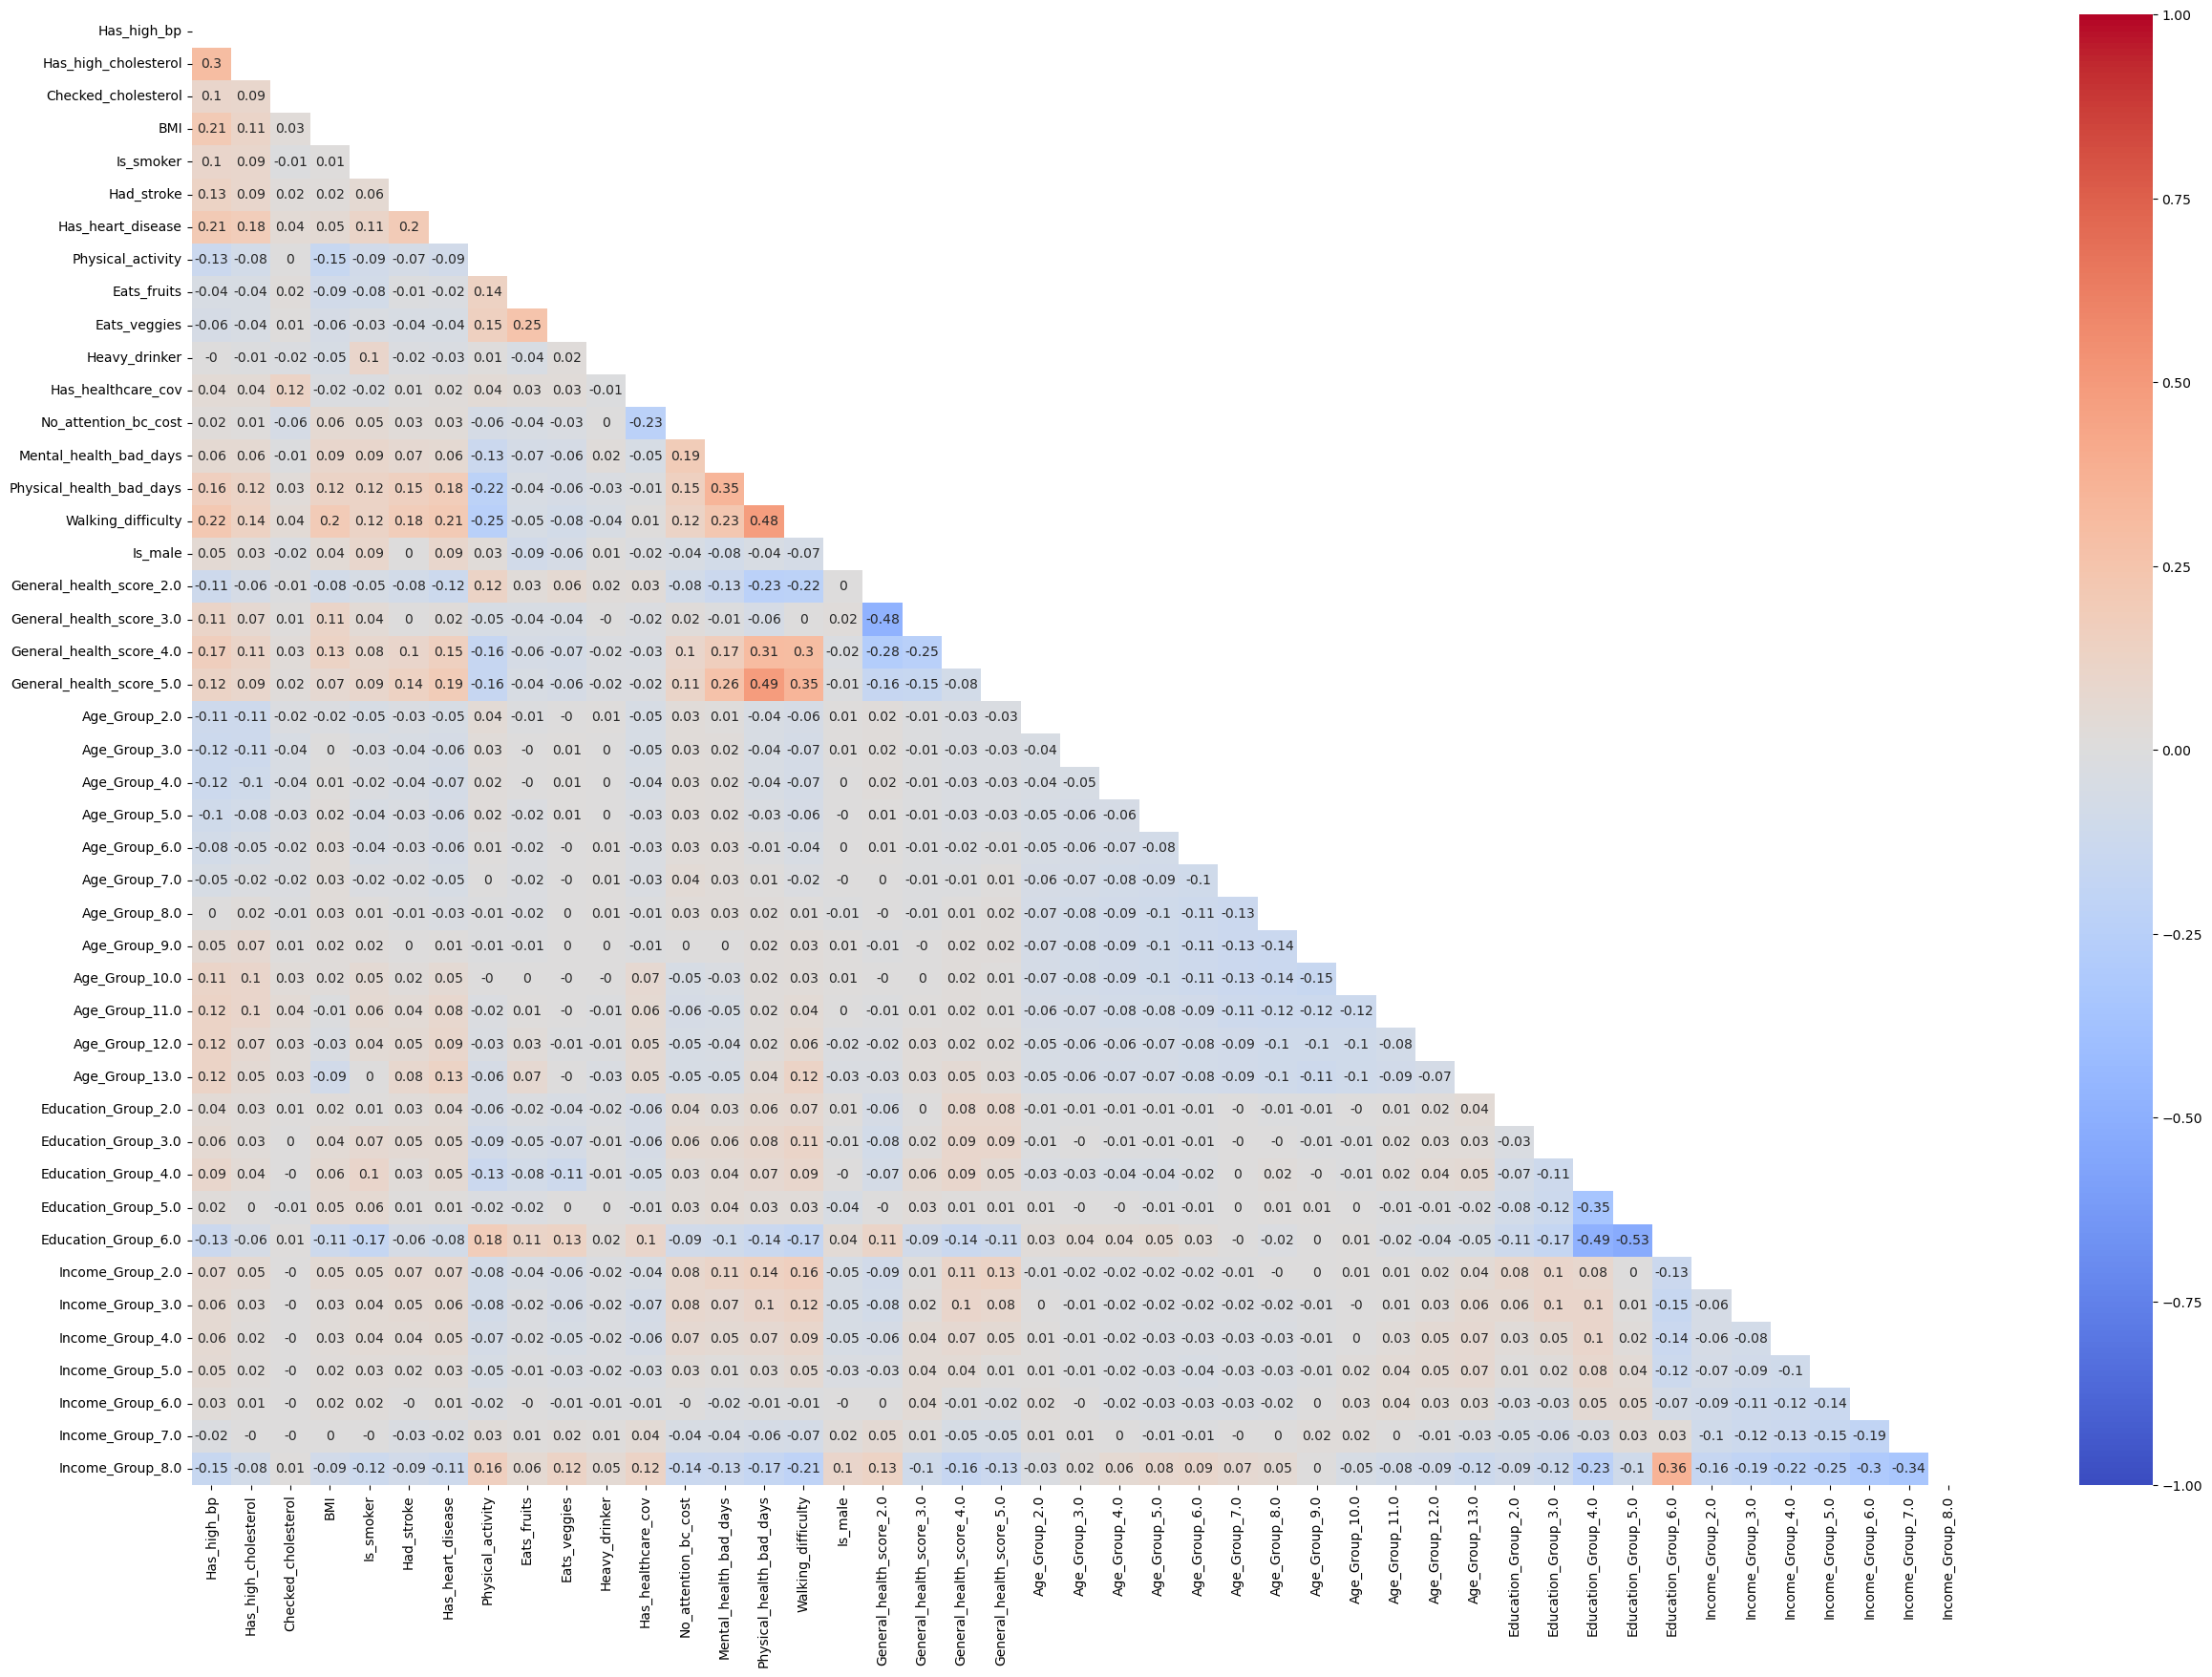

In [21]:
# calculate all the correlations between each independent variable

def plot_corr_heatmap(X):
    corr_df = X.corr()

    # mask for upper-triangle
    mask = np.triu(corr_df)

    # vaisualise heatmap
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr_df.round(2),
                annot=True,
                center=0,
                vmax=1,
                vmin=-1,
                mask=mask,
                cmap='coolwarm')
    plt.show()

plot_corr_heatmap(X)

Looking at the above heatmap, we can tell that Education_Group_6 has a stronly negative correlation with Education_Group_5 and Education_Group_4. Therefore, it will be dropped.

In [22]:
df_preprocessed = df_preprocessed.drop('Education_Group_6.0', axis=1)

In [23]:
df_preprocessed.to_csv("../Data/Prepocessed_data/Diabetes_Health_Indicators_Preprocessed.csv", index=False)